## csv 데이터 읽어서 oneshot encoding 으로 np array 만들기 - 벤츠 예제

In [71]:
# data 가져오기

import pandas as pd

data=pd.read_csv("C:/Users/NGV05/Desktop/실습/201026_mercedes_traindata.csv")
#data['ID']
#data['X375']
data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# category features 가져오기 - 문자가 있는 data의 분류

#cf = data.select_dtypes(include=['object'])
#cf

cf = data.select_dtypes(include=['object']).columns    
cf

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [36]:
# oneshot encoding

dummies = pd.get_dummies(data[cf])
dummies

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [38]:
# 문자 data 없애고 대신 만든 oneshot encoding 결과 추가

data = pd.concat([data.drop(cf,axis=1),dummies],axis=1)
data

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,8412,109.22,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
import numpy as np

X_df, y_df = data.drop(['y'],axis=1), data['y']     # y 분리
y_df = (y_df<np.median(y_df)).astype(float)         # float 형태로 변경
X_df

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,8412,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8415,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
X, y = X_df.values, y_df.values                     # 배열 형태로 변경
X, y

(array([[   0,    0,    0, ...,    0,    0,    0],
        [   6,    0,    0, ...,    0,    0,    0],
        [   7,    0,    0, ...,    0,    1,    0],
        ...,
        [8412,    0,    0, ...,    0,    0,    0],
        [8415,    0,    0, ...,    0,    0,    0],
        [8417,    0,    0, ...,    1,    0,    0]], dtype=int64),
 array([0., 1., 1., ..., 0., 1., 0.]))

In [62]:
X.shape, y.shape

((4209, 564), (4209,))

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(3788, 564) (421, 564) (421, 564)
(3788,) (421,) (421,)


.

## csv 데이터 읽어서 oneshot encoding 으로 np array 만들기 - 연습

In [116]:
import pandas as pd
import numpy as np

tdata = pd.read_csv("C:/Users/NGV05/Desktop/실습/201026_traindata1.csv")
tdata

,y,X0,X1,X2
0,1,0,a,bb
1,2,1,c,cb
2,3,1,b,t


In [119]:
tcf = tdata.select_dtypes(include=['object']).columns
tcf

Index(['X1', 'X2'], dtype='object')

In [121]:
tdummies = pd.get_dummies(tdata[tcf])
tdummies

,X1_a,X1_b,X1_c,X2_bb,X2_cb,X2_t
0,1,0,0,1,0,0
1,0,0,1,0,1,0
2,0,1,0,0,0,1


In [122]:
tdata = pd.concat([tdata.drop(tcf,axis=1),tdummies],axis=1)
tdata

,y,X0,X1_a,X1_b,X1_c,X2_bb,X2_cb,X2_t
0,1,0,1,0,0,1,0,0
1,2,1,0,0,1,0,1,0
2,3,1,0,1,0,0,0,1


In [123]:
tX_df, ty_df = tdata.drop(['y'],axis=1), tdata['y']
ty_df = (ty_df<np.mean(ty_df)).astype(float)         # 플롯 형태로 변경
tX_df

,X0,X1_a,X1_b,X1_c,X2_bb,X2_cb,X2_t
0,0,1,0,0,1,0,0
1,1,0,0,1,0,1,0
2,1,0,1,0,0,0,1


In [124]:
tX, ty = tX_df.values, ty_df.values
tX, ty

(array([[0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 0, 0, 1]], dtype=int64),
 array([1., 0., 0.]))

.

## LS, LR 에 대하여 'regularization' 값 변경에 따라 로그 남기고 모델 저장 - list, dictionary, 파일 

In [230]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from joblib import dump, load

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
score_dictionary_LS = {}
alpha_score_LS = pd.DataFrame()

for alpha in alpha_list:
    model_LS = RidgeClassifier(alpha=alpha)              # alpha 가 regularization, default=1
    model_LS.fit(X_train,y_train)
    score = model_LS.score(X_test,y_test)
#   score_dictionary_LS[alpha] = score                                          # dictionary 로 누적
    alpha_score_data = pd.DataFrame([[alpha,score]],columns=['alpha','score'])   # 혹은 DataFrame 으로 data 만들고
    alpha_score_LS = alpha_score.append(alpha_score_data)                           # DataFrame 에 누적
    dump(model_LS, 'C:/Users/NGV05/Desktop/실습/201026_alpha_score_LS_{}.joblib'.format(alpha))   # model 별 파일저장

#score_dictionary_LS
alpha_score_LS = alpha_score_LS.reset_index(drop=True)
alpha_score_LS.to_csv('C:/Users/NGV05/Desktop/실습/201026_alpha_score_LS.csv')   # score 파일저장, (기본경로는:'./201026_alpha_score_LS.csv')
alpha_score_LS

,alpha,score
0,0.001,0.883610
1,0.010,0.883610
2,0.100,0.883610
3,1.000,0.883610
4,10.000,0.881235
5,100.000,0.878860
6,1000.000,0.878860
7,10000.000,0.852732
8,10000.000,0.852732


In [199]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression

penalty_list = ['l2','none']
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
score_dictionary_LR = {}

for penalty in penalty_list:
#    if penalty == 'l2':
        for C in C_list:
            model_LR = LogisticRegression(penalty=penalty,C=C)
            model_LR.fit(X_train,y_train)
            score = model_LR.score(X_test,y_test)
            score_dictionary_LR[penalty,C] = score
    
score_dictionary_LR

C:\Users\NGV05\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NGV05\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\NGV05\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NGV05\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\NGV05\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

{('l2', 0.001): 0.8669833729216152,
 ('l2', 0.01): 0.8788598574821853,
 ('l2', 0.1): 0.8788598574821853,
 ('l2', 1): 0.8764845605700713,
 ('l2', 10): 0.8788598574821853,
 ('l2', 100): 0.8764845605700713,
 ('l2', 1000): 0.8764845605700713,
 ('l2', 10000): 0.8788598574821853,
 ('none', 0.001): 0.8788598574821853,
 ('none', 0.01): 0.8788598574821853,
 ('none', 0.1): 0.8788598574821853,
 ('none', 1): 0.8788598574821853,
 ('none', 10): 0.8788598574821853,
 ('none', 100): 0.8788598574821853,
 ('none', 1000): 0.8788598574821853,
 ('none', 10000): 0.8788598574821853}

.

## 로컬에 모델 저장하기

In [225]:
from joblib import dump, load
dump(model_LS, 'C:/Users/NGV05/Desktop/실습/201026_alpha_score_LS.joblib')

['C:/Users/NGV05/Desktop/실습/201026_alpha_score_LS.joblib']

In [234]:
model_load = load('C:/Users/NGV05/Desktop/실습/201026_alpha_score_LS.joblib')
print(model_load)
print(model_load.score(X_test,y_test))

RidgeClassifier(alpha=10000)
0.8527315914489311


.

## batch size 튜닝

In [252]:
#  hidden 16개 짜리 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_2_layer = Sequential()
model_2_layer.add(Dense(16,activation='relu'))
model_2_layer.add(Dense(1,activation='sigmoid'))
model_2_layer.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [255]:
# batch size  default 는 32 로 너무 작아서 loss가 널뛰게 됨

history = model_2_layer.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
119/119 [==============================] - 0s 754us/step - loss: 0.9839 - acc: 0.6600
Epoch 2/50
119/119 [==============================] - 0s 516us/step - loss: 0.5496 - acc: 0.7566
Epoch 3/50
119/119 [==============================] - 0s 695us/step - loss: 0.6731 - acc: 0.7458
Epoch 4/50
119/119 [==============================] - 0s 617us/step - loss: 0.4611 - acc: 0.8244
Epoch 5/50
119/119 [==============================] - 0s 543us/step - loss: 0.4285 - acc: 0.8353
Epoch 6/50
119/119 [==============================] - 0s 777us/step - loss: 0.3930 - acc: 0.8532
Epoch 7/50
119/119 [==============================] - 0s 532us/step - loss: 0.4204 - acc: 0.8361
Epoch 8/50
119/119 [==============================] - 0s 722us/step - loss: 0.4941 - acc: 0.8186
Epoch 9/50
119/119 [==============================] - 0s 538us/step - loss: 0.3651 - acc: 0.8606
Epoch 10/50
119/119 [==============================] - 0s 629us/step - loss: 0.5087 - acc: 0.8131
Epoch 11/50
119/119 [========

14/14 [==============================] - 0s 1ms/step - loss: 0.7039 - acc: 0.6936
[0.7039090991020203, 0.6935867071151733]


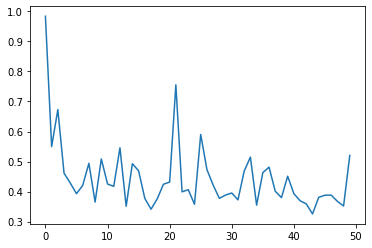

In [257]:
# 결과도 안좋고 loss 값이 엄청 널뛰는 것 확인

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
model_2_layer.evaluate(X_test,y_test)

In [258]:
# batch size 추가하여 다시 fit 했더니 loss 가 추세적으로 내려감

history = model_2_layer.fit(X_train,y_train,epochs=50,verbose=1,batch_size=512)

Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4307 - acc: 0.8537
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4302 - acc: 0.8490
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3505 - acc: 0.8786
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3033 - acc: 0.8852
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2894 - acc: 0.8891
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2830 - acc: 0.8920
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2851 - acc: 0.8907
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2794 - acc: 0.8910
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2827 - acc: 0.8904
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2890 - acc: 0.8894
Epoch 11/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2714 - acc: 0.89

14/14 [==============================] - 0s 871us/step - loss: 0.2573 - acc: 0.9002


[0.25731387734413147, 0.900237500667572]

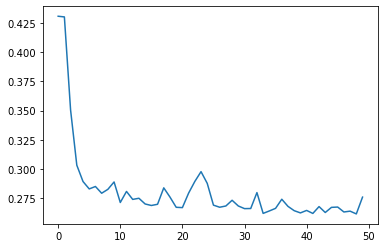

In [260]:
# 결과가 나아졌고 loss 도 내려가는 것 확인

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
model_2_layer.evaluate(X_test,y_test)

In [299]:
# tensorflow 는 epoch 돌 때마다 콜백 함수를 정의할 수 있음

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class plot_losses(Callback):
    
    def on_train_begin(self,logs={}):
        self.i = 0
        self.x = []
        self.losses = []
#        self.fig = plt.figure()
        self.logs = []
        
    def on_epoch_end(self,epoch,logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x,self.losses)
        plt.show()

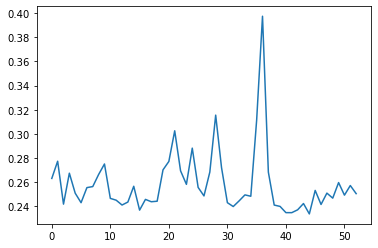

8/8 [==============================] - 0s 14ms/step - loss: 0.2505 - acc: 0.8955 - val_loss: 0.3787 - val_acc: 0.8551


In [312]:
# epoch 돌 때마다 콜백 함수 추가하기 - Early stopping, plot losses

from tensorflow.keras.callbacks import EarlyStopping

ES_callback = EarlyStopping(monitor='val_loss',                               # val_loss 를 기준으로? val_acc 를 기준으로?
                            patience=30,                                      # 몇 번 반대로 가면 멈출 것인지?
                            mode='auto')                                      # 그냥 자동으로 뭐는 늘면 멈추고, 뭐는 줄면 멈추고
history = model_2_layer.fit(X_train,y_train, 
                            validation_data=(X_val,y_val),                    # val data 안 넣으면 아니됨
                            epochs=100,verbose=1,batch_size=512, 
                            callbacks=[ES_callback,plot_losses()])            # loss plot 에 대한 콜백 추가